In [ ]:
import pandas as pd
import numpy as np
import scipy.io as scio
from sklearn.svm import SVC

%load_ext autoreload
%autoreload 2
import main

In [42]:
mat = scio.loadmat('ex5data1.mat')

x = pd.DataFrame(mat['X'])
y = pd.DataFrame(mat['y']).iloc[:, 0]

y0 = y[y == 0]
y1 = y[y == 1]
x0 = x.iloc[y0.index]
x1 = x.iloc[y1.index]

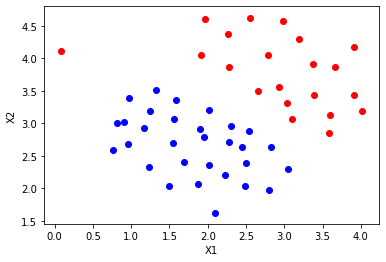

In [44]:
%matplotlib inline
import matplotlib.pyplot as plt

y0 = y[y == 0]
y1 = y[y == 1]
plt.scatter(x0[0], x0[1], c='blue')
plt.scatter(x1[0], x1[1], c='red')
plt.xlabel('X1')
plt.ylabel('X2')

plt.show()

In [58]:
clf1 = SVC(kernel='linear', C = 1)
clf1.fit(x, y)

clf2 = SVC(kernel='linear', C = 100)
clf2.fit(x, y)

SVC(C=100, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='linear', max_iter=-1, probability=False, random_state=None,
    shrinking=True, tol=0.001, verbose=False)

/mnt/d/Study/ML/venv/lib/python3.6/site-packages/ipykernel_launcher.py:15: UserWarning: No contour levels were found within the data range.
  from ipykernel import kernelapp as app
/mnt/d/Study/ML/venv/lib/python3.6/site-packages/ipykernel_launcher.py:24: UserWarning: No contour levels were found within the data range.


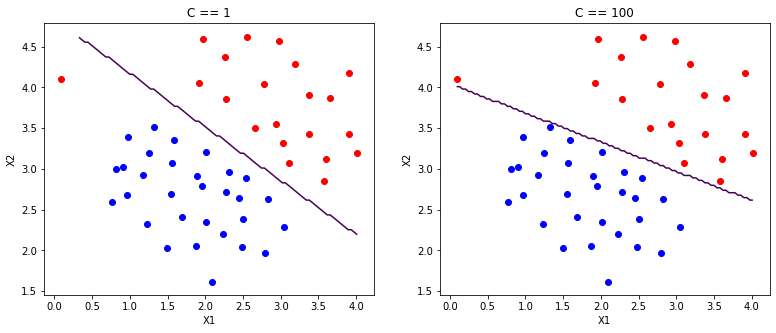

In [68]:
fig = plt.figure(figsize=(13, 5))

xx1, xx2 = np.meshgrid(
    np.linspace(x[0].min(), x[0].max(), 100), 
    np.linspace(x[1].min(), x[1].max(), 100),
)

ax = fig.add_subplot(121)
ax.scatter(x.iloc[y0.index, 0], x.iloc[y0.index, 1], c='blue')
ax.scatter(x.iloc[y1.index, 0], x.iloc[y1.index, 1], c='red')
ax.set_xlabel('X1')
ax.set_ylabel('X2')
ax.set_title('C == 1')
prediction = clf1.predict(np.c_[xx1.ravel(), xx2.ravel()]).reshape(xx1.shape)
ax.contour(xx1, xx2, prediction, [0])

ax = fig.add_subplot(122)
ax.scatter(x.iloc[y0.index, 0], x.iloc[y0.index, 1], c='blue')
ax.scatter(x.iloc[y1.index, 0], x.iloc[y1.index, 1], c='red')
ax.set_xlabel('X1')
ax.set_ylabel('X2')
ax.set_title('C == 100')
prediction = clf2.predict(np.c_[xx1.ravel(), xx2.ravel()]).reshape(xx1.shape)
ax.contour(xx1, xx2, prediction, [0])

plt.show()

In [65]:
predictions = clf1.predict(x)
correct = (y == predictions).sum()
print('Correct:', correct/len(y))

predictions = clf2.predict(x)
correct = (y == predictions).sum()
print('Correct:', correct/len(y))

Correct: 0.9803921568627451
Correct: 1.0
